Dataset created successfully!
   gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0    Male              0     Yes         No       5          Yes   
1  Female              1      No         No       2           No   
2    Male              0     Yes        Yes       8          Yes   
3  Female              0      No         No       1          Yes   
4    Male              1     Yes         No      12          Yes   

  InternetService  MonthlyCharges  TotalCharges Churn  
0             DSL              70           350    No  
1     Fiber optic              90           180   Yes  
2             DSL              60           480    No  
3     Fiber optic              85            85   Yes  
4             DSL              75           900    No  

🎯 Accuracy: 0.3333333333333333

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      0.50      0.50         2

    

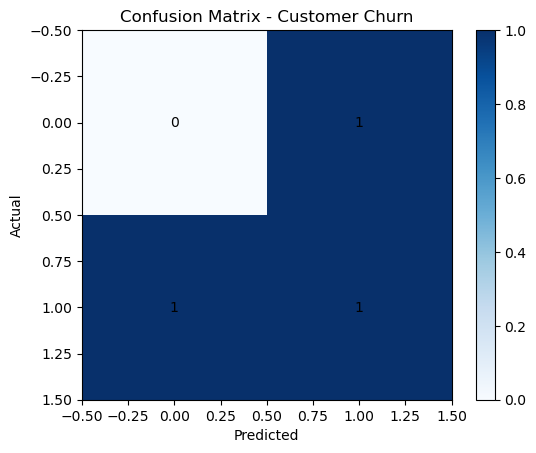

The customer is likely to STAY.


C:\Users\LINGESWARA\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Step 1: Create a small synthetic telecom churn dataset
data = pd.DataFrame({
    'gender': ['Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Female', 'Male'],
    'SeniorCitizen': [0, 1, 0, 0, 1, 0, 1, 1, 0, 0],
    'Partner': ['Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes'],
    'Dependents': ['No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No'],
    'tenure': [5, 2, 8, 1, 12, 3, 20, 10, 6, 4],
    'PhoneService': ['Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes'],
    'InternetService': ['DSL', 'Fiber optic', 'DSL', 'Fiber optic', 'DSL', 'No', 'Fiber optic', 'DSL', 'No', 'DSL'],
    'MonthlyCharges': [70, 90, 60, 85, 75, 50, 100, 65, 40, 55],
    'TotalCharges': [350, 180, 480, 85, 900, 150, 2000, 650, 240, 220],
    'Churn': ['No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'No']
})

print("Dataset created successfully!")
print(data.head())

# Step 2: Encode categorical features
label_encoders = {}
for col in ['gender', 'Partner', 'Dependents', 'PhoneService', 'InternetService', 'Churn']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Step 3: Split features and target
X = data.drop('Churn', axis=1)
y = data['Churn']

# Step 4: Scale numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

# Step 6: Build and train model (Random Forest)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 7: Evaluate
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("\n🎯 Accuracy:", acc)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 8: Confusion matrix visualization
cm = confusion_matrix(y_test, y_pred)

plt.imshow(cm, cmap='Blues')
plt.title('Confusion Matrix - Customer Churn')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Annotate the matrix
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='black')

plt.colorbar()
plt.show()

# Step 9: Predict new customer
new_customer = np.array([[1, 0, 1, 0, 15, 1, 1, 80, 1200]])  # sample input
new_customer_scaled = scaler.transform(new_customer)

prediction = model.predict(new_customer_scaled)

if prediction[0] == 1:
    print("🎯 The customer is likely to CHURN.")
else:
    print("The customer is likely to STAY.")
